<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/titanic_project_sklearn_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic = titanic.drop(['Cabin', 'Name', 'Ticket','PassengerId'],axis=1)

In [12]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis=1)
y=titanic['Survived'].copy()

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns
num_features


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder())
])

num_pipeline= Pipeline([(
    'imputer', SimpleImputer(strategy='median')
)])

transformer= ColumnTransformer([
    ('num',num_pipeline, num_features),
    ('cat',cat_pipeline, cat_features)
],remainder='passthrough')

In [18]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

column_names = transformer.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)
X_train_transformed_df
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=column_names)


In [19]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(random_state=42)

reg.fit(X_train_transformed_df, y_train)
reg.score(X_train_transformed_df, y_train)

0.9789325842696629

In [20]:
reg.score(X_test_transformed_df, y_test)

0.8100558659217877

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train_transformed_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [22]:
cv_rfc.score(X_train_transformed_df, y_train)

0.8623595505617978

In [23]:
cv_rfc.score(X_test_transformed_df, y_test)

0.8100558659217877

In [24]:
cv_rfc.best_score_

0.8300502314586822

In [25]:
cv_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [26]:
cv_rfc.best_estimator_

RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=200,
                       random_state=42)

In [27]:
titanic.shape

(891, 8)

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras import layers as L

model = Sequential(name='titanic')
model.add(L.InputLayer(input_shape=(X_train_transformed_df.shape[1],)))
model.add(L.Dense(512, activation='relu'))
model.add(L.Dense(1024, activation='relu'))
model.add(L.Dense(512, activation='relu'))
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(64, activation='relu'))
model.add(L.Dense(64, activation='relu'))
model.add(L.Dense(1, activation='sigmoid'))

model.summary()

Model: "titanic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [30]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])

In [31]:
hisroty = model.fit(X_train_transformed_df,y_train,
                    epochs=50)

Epoch 1/50
23/23 [==============================] - 5s 6ms/step - loss: 0.6318 - accuracy: 0.6924
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6713
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.6812
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6092 - accuracy: 0.6756
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6854
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6149 - accuracy: 0.6685
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6812
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5989 - accuracy: 0.6994
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.6685
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.6952
Epoch 11/50
23/23 [

In [32]:
X_train_transformed_df

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Missing,cat__Embarked_Q,cat__Embarked_S
0,1.0,45.5,0.0,0.0,28.5000,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,23.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,0.0,1.0
2,3.0,32.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,26.0,1.0,0.0,7.8542,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,6.0,4.0,2.0,31.2750,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,3.0,21.0,0.0,0.0,7.6500,1.0,0.0,0.0,0.0,0.0,1.0
708,1.0,28.0,0.0,0.0,31.0000,0.0,1.0,0.0,0.0,0.0,1.0
709,3.0,41.0,2.0,0.0,14.1083,0.0,1.0,0.0,0.0,0.0,1.0
710,1.0,14.0,1.0,2.0,120.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
model.evaluate(X_train_transformed_df,y_train)

23/23 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8202


[0.41899099946022034, 0.8202247023582458]

In [54]:
from os import name
import numpy as np
import keras
import tensorflow as tf
from keras import layers

inputs = tf.keras.Input(X_train_transformed_df.shape[1])
layer_1 =tf.keras.layers.Dense(1024, activation='relu')(inputs)
layer_2 =tf.keras.layers.Dense(512, activation='relu')(layer_1)
layer_3 =tf.keras.layers.Dense(512, activation='relu')(layer_2)
layer_4 =tf.keras.layers.Dense(256, activation='relu')(layer_3)
layer_5 =tf.keras.layers.Dense(128, activation='relu')(layer_4)
layer_6 =tf.keras.layers.Dense(64, activation='relu')(layer_5)
layer_7 =tf.keras.layers.Dense(32, activation='relu')(layer_6)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(layer_7)

model = keras.Model(inputs=inputs, outputs=outputs, name='titanic')

In [55]:
print(X_train_transformed_df.shape[1])

11


In [56]:
model.summary()

Model: "titanic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              12288     
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256

In [57]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
model.fit(X_train_transformed_df, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 3s 5ms/step - loss: 0.6294 - accuracy: 0.6798
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6225 - accuracy: 0.6770
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6868
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5985 - accuracy: 0.6966
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.6840
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5998 - accuracy: 0.6643
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5758 - accuracy: 0.7037
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5598 - accuracy: 0.6910
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.7388
Epoch 10/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7598
Epoch 11/50
23/23 [

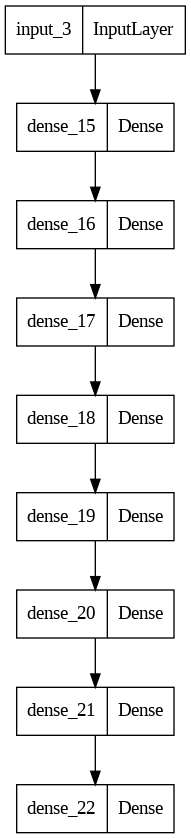

In [58]:
keras.utils.plot_model(model, "my_first_model.png")

In [59]:
test_scores = model.evaluate(X_test_transformed_df, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

6/6 - 0s - loss: 0.4368 - accuracy: 0.8101 - 272ms/epoch - 45ms/step
Test loss: 0.4368354380130768
Test accuracy: 0.8100558519363403


In [62]:
from keras import backend as K
K.clear_session()
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(1024, activation='relu')
    self.dense2 = tf.keras.layers.Dense(512, activation='relu')
    self.dense3 = tf.keras.layers.Dense(512, activation='relu')
    self.dense4 = tf.keras.layers.Dense(256, activation='relu')
    self.dense5 = tf.keras.layers.Dense(128, activation='relu')
    self.dense6 = tf.keras.layers.Dense(64, activation='relu')
    self.dense7 = tf.keras.layers.Dense(32, activation='relu')
    self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.dense4(x)
    x = self.dense5(x)
    x = self.dense6(x)
    x = self.dense7(x)
    return self.output_layer(x)


In [63]:
model=MyModel()

In [64]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
model.fit(X_train_transformed_df, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 3s 6ms/step - loss: 0.6316 - accuracy: 0.6812
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6217 - accuracy: 0.6756
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.6784
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5954 - accuracy: 0.7051
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.6882
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5902 - accuracy: 0.7163
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5840 - accuracy: 0.6812
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5946 - accuracy: 0.7135
Epoch 9/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.7051
Epoch 10/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.7331
Epoch 11/50
23/23 [

In [70]:
test_scores = model.evaluate(X_test_transformed_df, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

6/6 - 0s - loss: 0.4540 - accuracy: 0.8156 - 32ms/epoch - 5ms/step
Test loss: 0.4539574086666107
Test accuracy: 0.8156424760818481


In [71]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
model.fit(X_train_transformed_df,y_train,epochs=3000,callbacks=[early_stopping_callback, checkpoint_cb])

Epoch 1/3000
23/23 [==============================] - 0s 17ms/step - loss: 0.4346 - accuracy: 0.8160
Epoch 2/3000
23/23 [==============================] - 0s 9ms/step - loss: 0.4214 - accuracy: 0.8160
Epoch 3/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4422 - accuracy: 0.8090
Epoch 4/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4265 - accuracy: 0.8146
Epoch 5/3000
23/23 [==============================] - 0s 9ms/step - loss: 0.4209 - accuracy: 0.8160
Epoch 6/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4050 - accuracy: 0.8202
Epoch 7/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4047 - accuracy: 0.8174
Epoch 8/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4077 - accuracy: 0.8244
Epoch 9/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4099 - accuracy: 0.8160
Epoch 10/3000
23/23 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.832